# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import geoJSON file as a string

paris_geo = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts/02 Data/Original_Data/espaces_verts.geojson'

with open(paris_geo, 'r') as file:
    geojson_data = json.load(file)

# Inspect the first few features to understand its structure
geojson_data['features'][:2]

[{'type': 'Feature',
  'geometry': {'coordinates': [[[[2.3733184661747395, 48.886197359912416],
      [2.3733426287688713, 48.88620944290408],
      [2.373343638646444, 48.88620915500957],
      [2.37334568458146, 48.8862101432839],
      [2.3733995870775995, 48.88617132182829],
      [2.373388524495604, 48.88616612788798],
      [2.3733184661747395, 48.886197359912416]]],
    [[[2.3731636561193943, 48.8861207598094],
      [2.373233750566382, 48.88608924477507],
      [2.373209441952299, 48.886076950553154],
      [2.3731550208357586, 48.88611648237648],
      [2.3731636561193943, 48.8861207598094]]]],
   'type': 'MultiPolygon'},
  'properties': {'nsq_espace_vert': 11255,
   'nom_ev': 'JARDINIERES DU 39 QUAI DE LA SEINE',
   'type_ev': 'Décorations sur la voie publique',
   'categorie': 'Jardiniere',
   'adresse_numero': 39,
   'adresse_complement': None,
   'adresse_typevoie': 'QUAI DE LA',
   'adresse_libellevoie': 'SEINE',
   'adresse_codepostal': '75019',
   'poly_area': 19,
   's

In [4]:
paris_geo

'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts/02 Data/Original_Data/espaces_verts.geojson'

In [5]:
# Define path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_6/Final Project - Espaces Verts'

In [6]:
# Import the green spaces data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared_Data', 'espaces_verts_75_updated.csv'))

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Name,Type,Category,Street Number,Street Number Suffix,Street Type,Street Name,...,Perimeter,Year opened,Year renovated,Former name,Year name changed,Number of entities,Open 24hrs,Geo Shape,URL_PLAN,Area category
0,0,0,11255.0,JARDINIERES DU 39 QUAI DE LA SEINE,Décorations sur la voie publique,Jardiniere,39.0,NaN,QUAI DE LA,SEINE,...,30.737389,2011.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.3733184661747395, 48.886...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
1,1,1,10804.0,JARDINIERES DU PARVIS DE LA PLACE RAOUL DAUTRY,Décorations sur la voie publique,Jardiniere,6.0,S,PLACE,RAOUL DAUTRY,...,312.718568,NaN,NaN,NaN,NaN,4.0,NaN,"{""coordinates"": [[[[2.3216385869638, 48.841417...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Large size
2,2,2,10937.0,JARDINIERES ANGLE DES RUES DE TOLBIAC - BAUDRI...,Décorations sur la voie publique,Jardiniere,47.0,NaN,RUE,BAUDRICOURT,...,80.353023,2005.0,NaN,NaN,NaN,2.0,NaN,"{""coordinates"": [[[[2.363882470474931, 48.8265...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size
3,3,3,219.0,JARDIN FRANCOISE GIROUD,Promenades ouvertes,Jardin,4.0,V,PLACE D,ITALIE,...,245.468867,1878.0,2019.0,SQUARE DE LA PLACE D'ITALIE,2013.0,1.0,Oui,"{""coordinates"": [[[2.356129760906164, 48.83152...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Very large size
4,4,4,10303.0,JARDINIERE DE LA PLACE FRANZ LISZT,Décorations sur la voie publique,Jardiniere,2.0,BIS V,PLACE,FRANZ LISTZ,...,52.677758,NaN,NaN,NaN,NaN,1.0,NaN,"{""coordinates"": [[[2.351449405515269, 48.87773...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,Small size


In [8]:
df.shape

(2286, 25)

#### The contents of the csv and GeoJSON files align, even though column names differ. 
#### 'Name' (no missing values) in the csv file corresponds to 'nom_ev' in GeoJSON, and will therefore be used to match these datasets.

In [9]:
# Check missing values in the Paris green spaces cleaned dataset
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the percentage of missing values for each column
missing_percentage.sort_values(ascending=False)

Year renovated          95.756780
Year name changed       87.620297
Street Number Suffix    84.033246
Former name             77.909011
Open 24hrs              62.948381
Year opened             31.758530
Horticultural area      25.940507
Perimeter               24.890639
Actual total area       23.972003
Area category           23.972003
Calculated area         13.604549
Street Name             10.936133
Street Type             10.804899
Number of entities       3.412073
ID                       2.755906
URL_PLAN                 2.755906
Enclosure                2.143482
Street Number            0.087489
Geo Shape                0.087489
Type                     0.043745
Zip code                 0.000000
Unnamed: 0               0.000000
Category                 0.000000
Name                     0.000000
Unnamed: 0.1             0.000000
dtype: float64

In [10]:
# Remove Unnamed columns

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [11]:
df.columns

Index(['ID', 'Name', 'Type', 'Category', 'Street Number',
       'Street Number Suffix', 'Street Type', 'Street Name', 'Zip code',
       'Calculated area', 'Actual total area', 'Horticultural area',
       'Enclosure', 'Perimeter', 'Year opened', 'Year renovated',
       'Former name', 'Year name changed', 'Number of entities', 'Open 24hrs',
       'Geo Shape', 'URL_PLAN', 'Area category'],
      dtype='object')

### 2. Data wrangling 

In [12]:
# Checking for None values in GeoJSON 'nom_ev'

none_count = 0
for feature in geojson_data['features']:
    if feature['properties'].get('nom_ev') is None:
        none_count += 1

print(f"Found {none_count} features with 'nom_ev' set to None.")


Found 2 features with 'nom_ev' set to None.


In [14]:
# Fill missing 'nom_ev' with a placeholder 'unknown'

for feature in geojson_data['features']:
    if not feature['properties'].get('nom_ev'):
        feature['properties']['nom_ev'] = 'unknown'


### Encountering persistent problems with the GeoJSON file. Attempting to use Geo Shape coordinates in the csv file.

In [15]:
# Importing additional libraries

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [16]:
# Converting 'Geo Shape' JSON strings to Shapely Polygons and create a GeoDataFrame

def create_polygon(row):
    try:
        # Assuming the coordinate format is compatible with Polygon()
        # You might need to adjust the json.loads(row) depending on the format
        return Polygon(json.loads(row)['coordinates'][0])
    except Exception as e:
        return None  # Handle errors or incompatible formats

In [18]:
# Converting 'Geo Shape' to geometries

df['geometry'] = df['Geo Shape'].apply(create_polygon)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

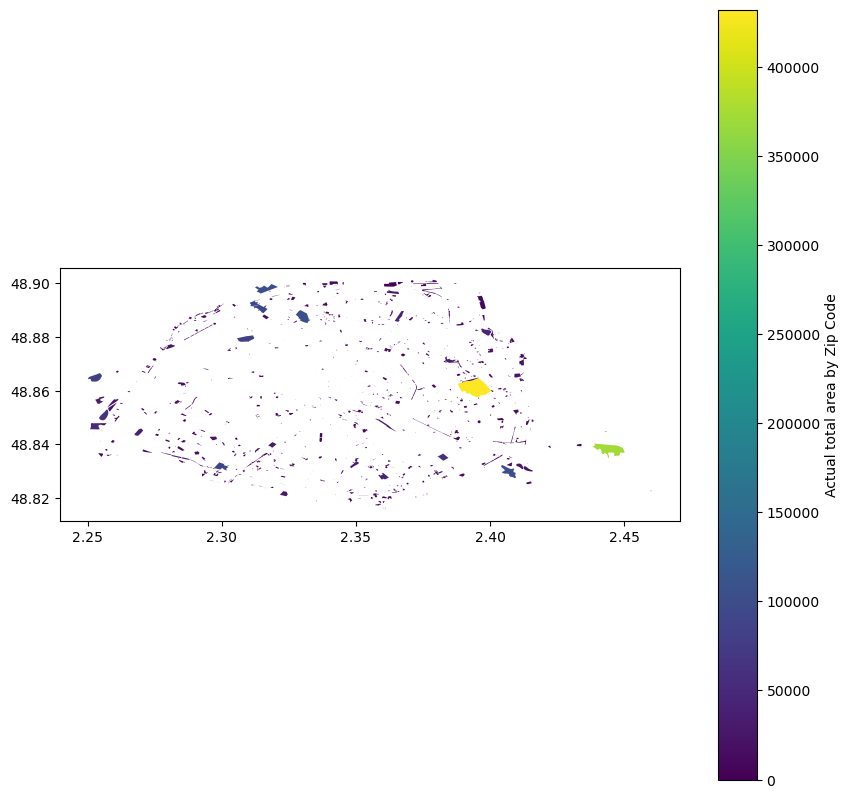

In [20]:
# Plot using GeoPandas and Matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Actual total area', ax=ax, legend=True, legend_kwds={'label': "Actual total area by Zip Code"})
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'label'

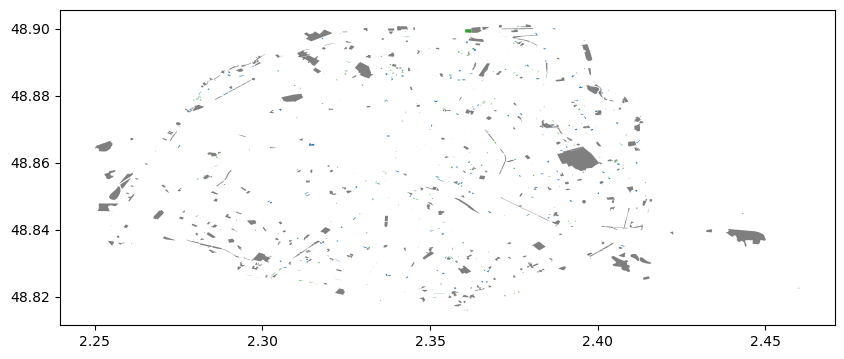

In [21]:
# Plot again using Area category

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Area category', ax=ax, legend=True, legend_kwds={'label': "Area category by Zip Code"})
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'label'

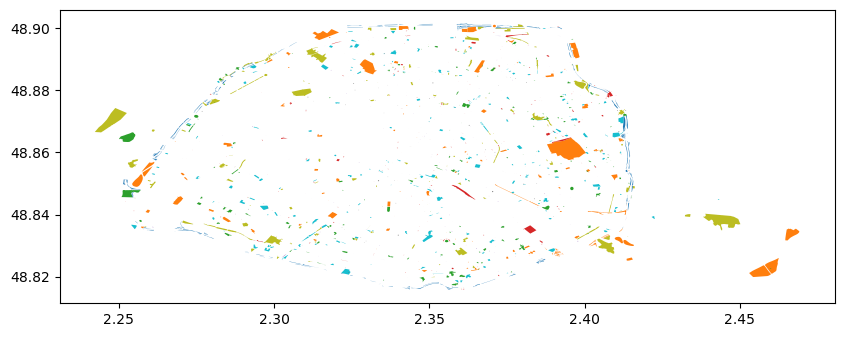

In [22]:
# Plot again using Name

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Name', ax=ax, legend=True, legend_kwds={'label': "Paris Green Spaces by Zip Code"})
plt.show()